# Microsoft Films Analysis

* Author:Sharon Mukami Mungai
* Student pace:Hybrid
* Scheduled project review date/time: Friday,22nd March 2024.
* Instructor Name:Miss.Maryann Mwikali


## Overview

This project analyzes the types of films released as well as their performances in the box office.Their performances are measured by the ratings, gross incomes and popularity.With this analysis Microsoft's new movie studio is able to determine which films to create.

### Business Understanding

Microsoft Company develops and supports software, services, devices, and solutions. Since it has little to no experience in the film industry,an analysis on differrent films is required to answer the following questions:

* What are the top movies?And from which studio?
* What are the top Genres? 
* Which Genres produce the highest gross incomes and highest profit earned?



### Data Understanding

The data files we'll be making use of are that provide information on the movies, the year released,  their votes, their gross incomes, thier production budget.
To uderstand our data, we need to explore the data files and familiarize ourselves with the columns and rows as well as the information within the file.

In [159]:
# import the relevant libraries
import pandas as pd
import numpy as np

In [160]:
#Create dataframes that represent the CSV files.
#movies_info_df=pd.read_csv(r"C:\Users\user\Documents\Moringa\Phase-1\Phaseproject\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv\tmdb.movies.csv", index_col=0)

movies_info_df=pd.read_csv(r"C:\Users\user\Documents\Moringa\Phase-1\Phaseproject\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv\bom.movie_gross.csv")

movies_budgets_df=pd.read_csv(r"C:\Users\user\Documents\Moringa\Phase-1\Phaseproject\dsc-phase-1-project-v2-4\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")

In [161]:
#Inspect the shapes and attributes of the attributes of the dataframes
#Run code cell(s) below

#### 1. movies_info Data

In [162]:
movies_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [163]:
movies_info_df.shape #The data has 3387 rows, 5 columns

(3387, 5)

In [164]:
movies_info_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [165]:
movies_info_df['title'].value_counts()

Bluebeard                                             2
The Purge: Election Year                              1
Ingrid Bergman: In Her Own Words                      1
2001: A Space Odyssey (2018 re-release)               1
13 Minutes                                            1
                                                     ..
Collide                                               1
The Duelist                                           1
Fate/Stay Night: Heaven's Feel - I. Presage Flower    1
Waking Sleeping Beauty                                1
Goodbye First Love                                    1
Name: title, Length: 3386, dtype: int64

In [166]:
movies_info_df['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
CFI             1
Trafalgar       1
JBG             1
Synergetic      1
NAV             1
Name: studio, Length: 257, dtype: int64

In [167]:
movies_info_df['year']=pd.to_datetime(movies_info_df['year'])

In [168]:
movies_info_df['year'].describe(datetime_is_numeric=True)

count                             3387
mean     1970-01-01 00:00:00.000002013
min      1970-01-01 00:00:00.000002010
25%      1970-01-01 00:00:00.000002012
50%      1970-01-01 00:00:00.000002014
75%      1970-01-01 00:00:00.000002016
max      1970-01-01 00:00:00.000002018
Name: year, dtype: object

#### 2. movies_budgets Data

In [169]:
movies_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [170]:
movies_budgets_df.shape #This data has 5782 rows, 6 columns

(5782, 6)

In [171]:
movies_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [172]:
movies_budgets_df['movie'].value_counts()

Halloween                 3
King Kong                 3
Home                      3
Dawn of the Dead          2
RoboCop                   2
                         ..
The Thousand Miles        1
The Women                 1
Superman II               1
Two Can Play That Game    1
Next Day Air              1
Name: movie, Length: 5698, dtype: int64

In [173]:
movies_budgets_df['production_budget'].describe()

count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

In [174]:
movies_budgets_df['domestic_gross'].value_counts()

$0             548
$8,000,000       9
$7,000,000       7
$2,000,000       7
$10,000,000      6
              ... 
$5,732,587       1
$687,185         1
$476,270         1
$59,623,958      1
$13,383,747      1
Name: domestic_gross, Length: 5164, dtype: int64

In [175]:
movies_budgets_df['worldwide_gross'].value_counts()

$0              367
$8,000,000        9
$2,000,000        6
$7,000,000        6
$5,000,000        4
               ... 
$253,555,383      1
$4,454,853        1
$4,496,583        1
$2,412,123        1
$10,108,016       1
Name: worldwide_gross, Length: 5356, dtype: int64

# Data Cleaning

# 1. Movies_info Data

In [176]:
movies_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2037 non-null   object        
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 132.4+ KB


In [177]:
movies_info_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,1970-01-01 00:00:00.000002010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,1970-01-01 00:00:00.000002010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,1970-01-01 00:00:00.000002010
3,Inception,WB,292600000.0,535700000,1970-01-01 00:00:00.000002010
4,Shrek Forever After,P/DW,238700000.0,513900000,1970-01-01 00:00:00.000002010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,1970-01-01 00:00:00.000002018
3383,Edward II (2018 re-release),FM,4800.0,NaN,1970-01-01 00:00:00.000002018
3384,El Pacto,Sony,2500.0,NaN,1970-01-01 00:00:00.000002018
3385,The Swan,Synergetic,2400.0,NaN,1970-01-01 00:00:00.000002018


In [178]:
movies_info_df.drop(columns=['domestic_gross','foreign_gross'],inplace=True)
movies_info_df

,title,studio,year
0,Toy Story 3,BV,1970-01-01 00:00:00.000002010
1,Alice in Wonderland (2010),BV,1970-01-01 00:00:00.000002010
2,Harry Potter and the Deathly Hallows Part 1,WB,1970-01-01 00:00:00.000002010
3,Inception,WB,1970-01-01 00:00:00.000002010
4,Shrek Forever After,P/DW,1970-01-01 00:00:00.000002010
...,...,...,...
3382,The Quake,Magn.,1970-01-01 00:00:00.000002018
3383,Edward II (2018 re-release),FM,1970-01-01 00:00:00.000002018
3384,El Pacto,Sony,1970-01-01 00:00:00.000002018
3385,The Swan,Synergetic,1970-01-01 00:00:00.000002018


In [179]:
info_duplicates=movies_info_df[movies_info_df.duplicated()]
len(info_duplicates)

0

In [180]:
movies_info_df['studio']=pd.DataFrame(movies_info_df['studio'])
movies_info_df['studio']

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3387, dtype: object

In [181]:
movies_info_df.isna()

,title,studio,year
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3382,False,False,False
3383,False,False,False
3384,False,False,False
3385,False,False,False


In [182]:
movies_info_df.isna().sum()

title     0
studio    5
year      0
dtype: int64

In [183]:
movies_info_df.dropna(subset=['studio'], inplace=True)
movies_info_df

,title,studio,year
0,Toy Story 3,BV,1970-01-01 00:00:00.000002010
1,Alice in Wonderland (2010),BV,1970-01-01 00:00:00.000002010
2,Harry Potter and the Deathly Hallows Part 1,WB,1970-01-01 00:00:00.000002010
3,Inception,WB,1970-01-01 00:00:00.000002010
4,Shrek Forever After,P/DW,1970-01-01 00:00:00.000002010
...,...,...,...
3382,The Quake,Magn.,1970-01-01 00:00:00.000002018
3383,Edward II (2018 re-release),FM,1970-01-01 00:00:00.000002018
3384,El Pacto,Sony,1970-01-01 00:00:00.000002018
3385,The Swan,Synergetic,1970-01-01 00:00:00.000002018


In [184]:
movies_info_df.isna().sum()

title     0
studio    0
year      0
dtype: int64

In [185]:
movies_info_df.drop(columns=['year'],inplace=True)

# 2.Movies_budgets Data

In [186]:
movies_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [187]:
duplicates = [movies_budgets_df.duplicated()]
len(duplicates)

1

In [188]:
duplicates

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 5777    False
 5778    False
 5779    False
 5780    False
 5781    False
 Length: 5782, dtype: bool]

In [189]:
movies_budgets_df.drop_duplicates()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [190]:
#len(duplicates)

In [191]:
#Now that we've removed duplicates, we move to the next; Null data.

In [192]:
movies_budgets_df.isna()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [193]:
movies_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [194]:
#There are zero null/NaN values in the data

In [195]:
movies_budgets_dict=movies_budgets_df.to_dict('records')

In [196]:
movies_budgets_df['movie']=movies_budgets_df['movie'].replace('\x80\x99s', ' ', regex=True)

In [197]:
movies_budgets_df['movie']=movies_budgets_df['movie'].replace('\x80\x99', ' ', regex=True)

In [198]:
movies_budgets_df['movie']=movies_budgets_df['movie'].replace('\x80\x94', ' ', regex=True)

In [199]:
movies_budgets_df['movie']=movies_budgets_df['movie'].replace('Jin lÃ\xadng shÃ\xad san chai', 'Jin ling shi sanchai', regex=True)

In [200]:
movies_budgets_df['movie'].to_dict()   

{0: 'Avatar',
 1: 'Pirates of the Caribbean: On Stranger Tides',
 2: 'Dark Phoenix',
 3: 'Avengers: Age of Ultron',
 4: 'Star Wars Ep. VIII: The Last Jedi',
 5: 'Star Wars Ep. VII: The Force Awakens',
 6: 'Avengers: Infinity War',
 7: 'Pirates of the Caribbean: At Worldâ  End',
 8: 'Justice League',
 9: 'Spectre',
 10: 'The Dark Knight Rises',
 11: 'Solo: A Star Wars Story',
 12: 'The Lone Ranger',
 13: 'John Carter',
 14: 'Tangled',
 15: 'Spider-Man 3',
 16: 'Captain America: Civil War',
 17: 'Batman v Superman: Dawn of Justice',
 18: 'The Hobbit: An Unexpected Journey',
 19: 'Harry Potter and the Half-Blood Prince',
 20: 'The Hobbit: The Desolation of Smaug',
 21: 'The Hobbit: The Battle of the Five Armies',
 22: 'The Fate of the Furious',
 23: 'Superman Returns',
 24: 'Pirates of the Caribbean: Dead Men Tell No Tales',
 25: 'Quantum of Solace',
 26: 'The Avengers',
 27: 'Pirates of the Caribbean: Dead Manâ  Chest',
 28: 'Man of Steel',
 29: 'The Chronicles of Narnia: Prince Caspian'

In [201]:
movies_budgets_df['production_budget'].dtype

dtype('O')

In [202]:
def convert_to_integer(value):
    cleaned_value= value.replace('$','').replace(',','')
    return(int(cleaned_value))

In [203]:
movies_budgets_df['production_budget']=movies_budgets_df['production_budget'].apply(convert_to_integer)

In [204]:
movies_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,$0
5778,79,"Apr 2, 1999",Following,6000,"$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,$0


In [205]:
movies_budgets_df['production_budget'].dtype

dtype('int64')

In [206]:
movies_budgets_df['domestic_gross']=movies_budgets_df['domestic_gross'].apply(convert_to_integer)

In [207]:
movies_budgets_df['worldwide_gross']=movies_budgets_df['worldwide_gross'].apply(convert_to_integer)

In [208]:
movies_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [209]:
def format_with_commas(value):
    return '{:,}'.format(value)

In [210]:
movies_budgets_df['production_budget']=movies_budgets_df['production_budget'].apply(format_with_commas)

In [211]:
movies_budgets_df['production_budget']

0       425,000,000
1       410,600,000
2       350,000,000
3       330,600,000
4       317,000,000
           ...     
5777          7,000
5778          6,000
5779          5,000
5780          1,400
5781          1,100
Name: production_budget, Length: 5782, dtype: object

In [212]:
movies_budgets_df['domestic_gross']=movies_budgets_df['domestic_gross'].apply(format_with_commas)

In [213]:
movies_budgets_df['worldwide_gross']=movies_budgets_df['worldwide_gross'].apply(format_with_commas)

In [214]:
movies_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"7,000",0,0
5778,79,"Apr 2, 1999",Following,"6,000","48,482","240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"5,000","1,338","1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"1,400",0,0


In [215]:
movies_budgets_df=movies_budgets_df.sort_values('id')
movies_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,"1,100,000","39,659","81,371"
2500,1,"Jun 16, 1978",Jaws 2,"20,000,000","102,922,376","208,900,376"
4200,1,"Mar 18, 2011",Winter in Wartime,"5,800,000","542,860","9,662,214"
2400,1,"Jun 24, 1987",Spaceballs,"22,700,000","38,119,483","38,119,483"
...,...,...,...,...,...,...
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,"8,000,000","6,758,416","9,266,180"
299,100,"Jul 22, 2005",The Island,"120,000,000","35,818,913","163,018,913"
699,100,"Nov 8, 1996",Ransom,"70,000,000","136,492,681","308,700,000"
799,100,"Dec 8, 2004",Blade: Trinity,"65,000,000","52,397,389","131,353,165"


In [216]:
movies_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,"1,100,000","39,659","81,371"
2500,1,"Jun 16, 1978",Jaws 2,"20,000,000","102,922,376","208,900,376"
4200,1,"Mar 18, 2011",Winter in Wartime,"5,800,000","542,860","9,662,214"
2400,1,"Jun 24, 1987",Spaceballs,"22,700,000","38,119,483","38,119,483"
...,...,...,...,...,...,...
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,"8,000,000","6,758,416","9,266,180"
299,100,"Jul 22, 2005",The Island,"120,000,000","35,818,913","163,018,913"
699,100,"Nov 8, 1996",Ransom,"70,000,000","136,492,681","308,700,000"
799,100,"Dec 8, 2004",Blade: Trinity,"65,000,000","52,397,389","131,353,165"


In [217]:
#At the end of our Data cleaning process, we join both datasets into one dataframe containing all columns in both data, while merging both the movies and title columns AND the year

In [218]:
df1=movies_info_df
df2=movies_budgets_df

merged_df = pd.merge(df1, df2, left_on='title', right_on='movie', how='outer')
merged_df.drop('title', axis=1, inplace=True)
merged_df

,studio,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,BV,47.0,"Jun 18, 2010",Toy Story 3,"200,000,000","415,004,880","1,068,879,522"
1,BV,NaN,NaN,NaN,NaN,NaN,NaN
2,WB,NaN,NaN,NaN,NaN,NaN,NaN
3,WB,38.0,"Jul 16, 2010",Inception,"160,000,000","292,576,195","835,524,642"
4,P/DW,27.0,"May 21, 2010",Shrek Forever After,"165,000,000","238,736,787","756,244,673"
...,...,...,...,...,...,...,...
7922,NaN,100.0,"Dec 31, 2013",Heli,"1,000,000",0,"552,614"
7923,NaN,100.0,"Dec 18, 1985",Brazil,"15,000,000","9,929,135","9,932,146"
7924,NaN,100.0,"Nov 8, 1996",Ransom,"70,000,000","136,492,681","308,700,000"
7925,NaN,100.0,"Dec 8, 2004",Blade: Trinity,"65,000,000","52,397,389","131,353,165"


In [219]:
merged_df.isna().sum()

studio               4536
id                   2145
release_date         2145
movie                2145
production_budget    2145
domestic_gross       2145
worldwide_gross      2145
dtype: int64

In [220]:
merged_df['id']=merged_df['id'].fillna(0)

In [221]:
mode_value = merged_df['studio'].mode()[0]
merged_df['studio'] =merged_df['studio'].fillna(mode_value)

In [222]:
merged_df.isna().sum()

studio                  0
id                      0
release_date         2145
movie                2145
production_budget    2145
domestic_gross       2145
worldwide_gross      2145
dtype: int64


After joining both dasets, our final output contains NaN Values.
It is normal to want to get rid of or replacing the values.
However due to raised questions on the NaN Values, it is not advisable to drop or replace all the NaN values at once.
The questions include:
* Do the NaN values represent No movies being produced and released in certain years?
* Did the movies flop/no gross profits were earned?
* Are there any movies that were produced but never released? e.t.c.


# Analysis

In [223]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7927 entries, 0 to 7926
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             7927 non-null   object 
 1   id                 7927 non-null   float64
 2   release_date       5782 non-null   object 
 3   movie              5782 non-null   object 
 4   production_budget  5782 non-null   object 
 5   domestic_gross     5782 non-null   object 
 6   worldwide_gross    5782 non-null   object 
dtypes: float64(1), object(6)
memory usage: 495.4+ KB


In [224]:
merged_df.head()

,studio,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,BV,47.0,"Jun 18, 2010",Toy Story 3,"200,000,000","415,004,880","1,068,879,522"
1,BV,0.0,NaN,NaN,NaN,NaN,NaN
2,WB,0.0,NaN,NaN,NaN,NaN,NaN
3,WB,38.0,"Jul 16, 2010",Inception,"160,000,000","292,576,195","835,524,642"
4,P/DW,27.0,"May 21, 2010",Shrek Forever After,"165,000,000","238,736,787","756,244,673"


In [225]:
merged_df.tail()

,studio,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
7922,IFC,100.0,"Dec 31, 2013",Heli,"1,000,000",0,"552,614"
7923,IFC,100.0,"Dec 18, 1985",Brazil,"15,000,000","9,929,135","9,932,146"
7924,IFC,100.0,"Nov 8, 1996",Ransom,"70,000,000","136,492,681","308,700,000"
7925,IFC,100.0,"Dec 8, 2004",Blade: Trinity,"65,000,000","52,397,389","131,353,165"
7926,IFC,100.0,"Dec 9, 1988",Twins,"15,000,000","111,936,388","216,600,000"


In [226]:
duplicates = [merged_df.duplicated()]
len(duplicates)

1

In [227]:
merged_df.drop_duplicates()

,studio,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,BV,47.0,"Jun 18, 2010",Toy Story 3,"200,000,000","415,004,880","1,068,879,522"
1,BV,0.0,NaN,NaN,NaN,NaN,NaN
2,WB,0.0,NaN,NaN,NaN,NaN,NaN
3,WB,38.0,"Jul 16, 2010",Inception,"160,000,000","292,576,195","835,524,642"
4,P/DW,27.0,"May 21, 2010",Shrek Forever After,"165,000,000","238,736,787","756,244,673"
...,...,...,...,...,...,...,...
7922,IFC,100.0,"Dec 31, 2013",Heli,"1,000,000",0,"552,614"
7923,IFC,100.0,"Dec 18, 1985",Brazil,"15,000,000","9,929,135","9,932,146"
7924,IFC,100.0,"Nov 8, 1996",Ransom,"70,000,000","136,492,681","308,700,000"
7925,IFC,100.0,"Dec 8, 2004",Blade: Trinity,"65,000,000","52,397,389","131,353,165"


#### What are the frequencies for the gross earnings?

In [228]:
merged_df.dropna(subset=['domestic_gross'], inplace=True)

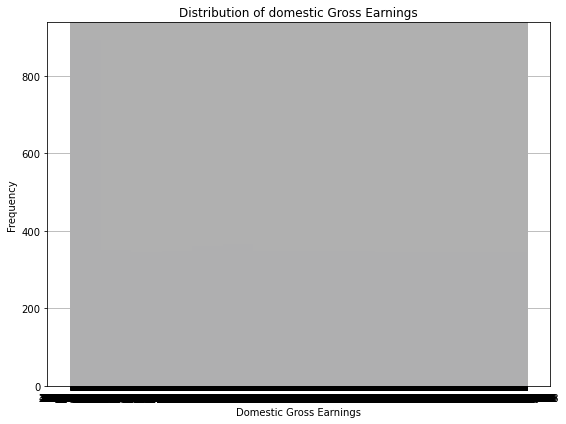

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(merged_df['domestic_gross'], bins=15)
plt.title('Distribution of domestic Gross Earnings')
plt.xlabel('Domestic Gross Earnings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

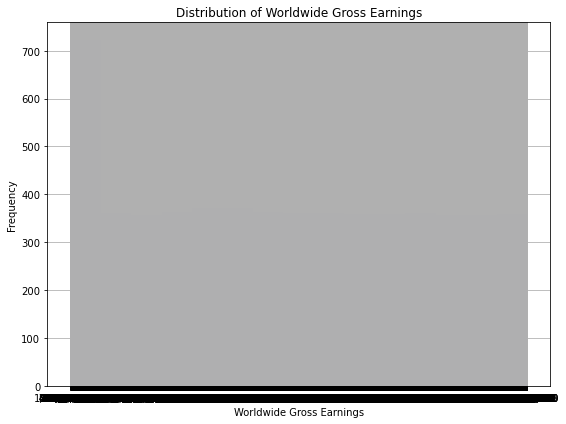

In [230]:
plt.figure(figsize=(8, 6))
plt.hist(merged_df['worldwide_gross'], bins=15)
plt.title('Distribution of Worldwide Gross Earnings')
plt.xlabel('Worldwide Gross Earnings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

 This can be useful in understanding the frequencies of different earnnig levels.

#### What movie has highest  gross? 

a.Domestic Gross

In [231]:
sorted_movies1 = merged_df.sort_values(by='domestic_gross', ascending=False)

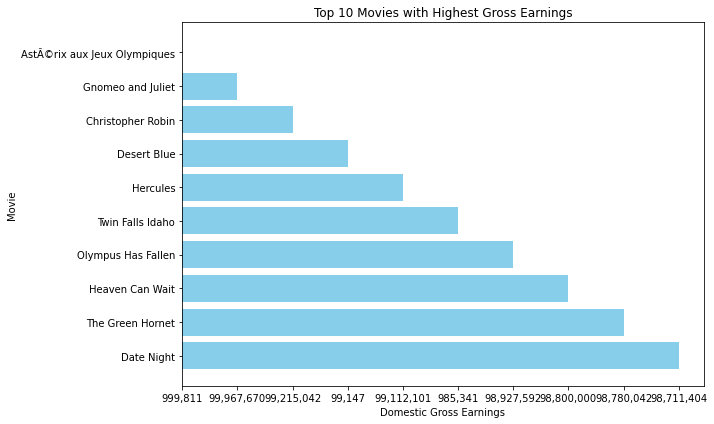

In [232]:
import matplotlib.pyplot as plt

top_movies1 = sorted_movies1.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_movies1['movie'], top_movies1['domestic_gross'], color='skyblue')
plt.xlabel('Domestic Gross Earnings')
plt.ylabel('Movie')
plt.title('Top 10 Movies with Highest Gross Earnings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

b.Worldwide Gross

In [233]:
sorted_movies2 = merged_df.sort_values(by='worldwide_gross', ascending=False)

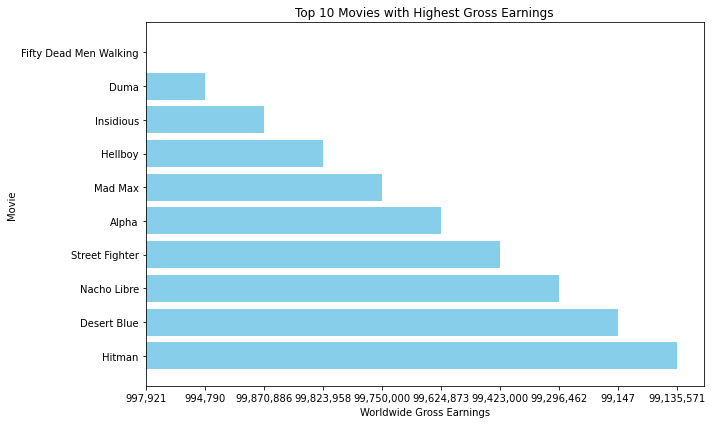

In [234]:
import matplotlib.pyplot as plt

top_movies2 = sorted_movies2.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_movies2['movie'], top_movies2['worldwide_gross'], color='skyblue')
plt.xlabel('Worldwide Gross Earnings')
plt.ylabel('Movie')
plt.title('Top 10 Movies with Highest Gross Earnings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### what was the highest profit earned?

In [235]:
merged_df.dropna(subset=['domestic_gross'], inplace=True)

In [236]:
merged_df.dropna(subset=['production_budget'], inplace=True)

In [ ]:
merged_df['profit'] = merged_df['domestic_gross'] - merged_df['production_budget']

highest_profit_index = merged_df['profit'].idxmax()
studio_of_highest_profit_movie = merged_df.loc[highest_profit_index, 'studio']
highest_profit = merged_df.loc[highest_profit_index, 'profit']
